# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [38]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [39]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [40]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [41]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [42]:
# Your code here :
from sklearn.model_selection import train_test_split

X = data.drop(columns=["MEDV"])
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (404, 13)
Tamaño del conjunto de prueba: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [43]:
# Your code here :
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Coeficientes del modelo:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"Intercepto: {model.intercept_:.2f}")

print("\nPrimeras 5 predicciones en el conjunto de entrenamiento:")
print(y_train_pred[:5])
print("\nPrimeras 5 predicciones en el conjunto de prueba:")
print(y_test_pred[:5])

Coeficientes del modelo:
CRIM: -0.11
ZN: 0.03
INDUS: 0.04
CHAS: 2.78
NOX: -17.20
RM: 4.44
AGE: -0.01
DIS: -1.45
RAD: 0.26
TAX: -0.01
PTRATIO: -0.92
B: 0.01
LSTAT: -0.51
Intercepto: 30.25

Primeras 5 predicciones en el conjunto de entrenamiento:
[10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]

Primeras 5 predicciones en el conjunto de prueba:
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


## 3. Calculate and print R-squared for both the training and the testing set.

In [44]:
# Your code here :
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_train = r2_score(y_train, y_train_pred)

mse_train = mean_squared_error(y_train, y_train_pred)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [45]:
# Your code here :
r2_test = r2_score(y_test, y_test_pred)

mse_test = mean_squared_error(y_test, y_test_pred)


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [46]:
# Your code here :
mae_train = mean_absolute_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)

print("Evaluación del modelo:")
print(f"Conjunto de entrenamiento: R² = {r2_train:.2f}, MSE = {mse_train:.2f}, MAE = {mae_train:.2f}")
print(f"Conjunto de prueba: R² = {r2_test:.2f}, MSE = {mse_test:.2f}, MAE = {mae_test:.2f}")

Evaluación del modelo:
Conjunto de entrenamiento: R² = 0.75, MSE = 21.64, MAE = 3.31
Conjunto de prueba: R² = 0.67, MSE = 24.29, MAE = 3.19


## Classification Model Evaluation

In [47]:
from sklearn.datasets import load_iris
data = load_iris()

In [48]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [49]:
column_names = data.feature_names

In [50]:
df = pd.DataFrame(data['data'],columns=column_names)

In [51]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
target = pd.DataFrame(data.target)

In [53]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [54]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [55]:
# Your code here :
from sklearn.model_selection import train_test_split

X = df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (120, 4)
Tamaño del conjunto de prueba: (30, 4)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [56]:
# Your code here :
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=200)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [57]:
# Your code here :
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_train_pred: {y_train_pred.shape}")

Forma de y_train: (120, 1)
Forma de y_train_pred: (404,)


In [58]:
print(type(y_train))
print(type(y_test))
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(120, 1)
(30, 1)


In [59]:
y_test = y_test.values.ravel()

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [60]:
# Your code here :
y_train_pred = model.predict(X_train)

print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_train_pred: {y_train_pred.shape}")

y_test_pred = model.predict(X_test)

print(f"Dimensiones de y_test: {y_test.shape}")
print(f"Dimensiones de y_test_pred: {y_test_pred.shape}")

Dimensiones de y_train: (120, 1)
Dimensiones de y_train_pred: (120,)
Dimensiones de y_test: (30,)
Dimensiones de y_test_pred: (30,)


In [61]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train:.2f}")
print(f"Accuracy en el conjunto de prueba: {accuracy_test:.2f}")

Accuracy en el conjunto de entrenamiento: 0.97
Accuracy en el conjunto de prueba: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [62]:
# Your code here :
from sklearn.metrics import precision_score

precision_train = precision_score(y_train, y_train_pred, average='weighted')

precision_test = precision_score(y_test, y_test_pred, average='weighted')

print(f"Precision en el conjunto de entrenamiento: {precision_train:.2f}")
print(f"Precision en el conjunto de prueba: {precision_test:.2f}")

Precision en el conjunto de entrenamiento: 0.98
Precision en el conjunto de prueba: 1.00


## 11. Calculate and print the recall score for both the training and the testing set.

In [63]:
# Your code here :
from sklearn.metrics import recall_score

recall_train = recall_score(y_train, y_train_pred, average='weighted')

recall_test = recall_score(y_test, y_test_pred, average='weighted')

print(f"Recall en el conjunto de entrenamiento: {recall_train:.2f}")
print(f"Recall en el conjunto de prueba: {recall_test:.2f}")

Recall en el conjunto de entrenamiento: 0.97
Recall en el conjunto de prueba: 1.00


## 12. Calculate and print the F1 score for both the training and the testing set.

In [64]:
# Your code here :
# Your code here :
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='weighted')

f1_test = f1_score(y_test, y_test_pred, average='weighted')

print(f"F1-score en el conjunto de entrenamiento: {f1_train:.2f}")
print(f"F1-score en el conjunto de prueba: {f1_test:.2f}")

F1-score en el conjunto de entrenamiento: 0.97
F1-score en el conjunto de prueba: 1.00


## 13. Generate confusion matrices for both the training and the testing set.

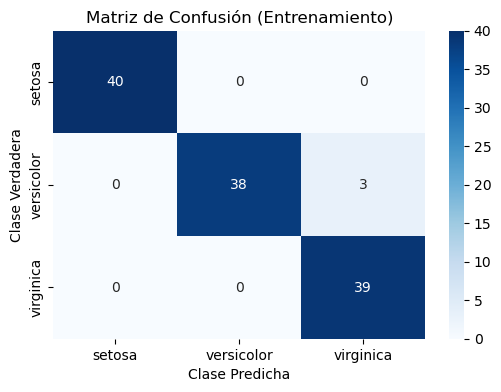

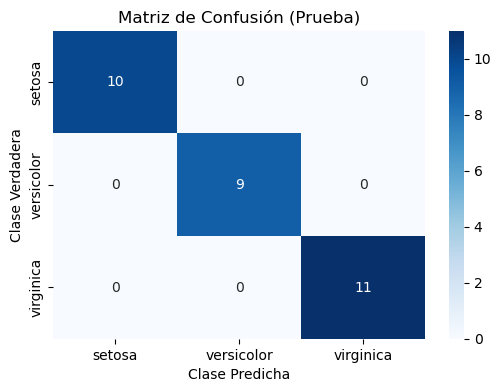

In [65]:
# Your code here :
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_train = confusion_matrix(y_train, y_train_pred)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(title)
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()

plot_confusion_matrix(conf_matrix_train, "Matriz de Confusión (Entrenamiento)")
plot_confusion_matrix(conf_matrix_test, "Matriz de Confusión (Prueba)")

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [66]:
# Have fun here !
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

print(f"Dimensiones de y_train_pred_tree: {y_train_pred_tree.shape}")
print(f"Dimensiones de y_test_pred_tree: {y_test_pred_tree.shape}")

Dimensiones de y_train_pred_tree: (120,)
Dimensiones de y_test_pred_tree: (30,)
